In [1]:
# import libraries
import csv
import os
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

In [2]:
# Grant access to google drive.
# Run this cell, then you’ll see a link, click on that link, allow access
# Copy the code that pops up, paste it in the box, hit Enter

from google.colab import drive
drive.mount('/content/gdrive')

# Change working directory to be current folder
# os.chdir('/content/gdrive/My Drive/Your Folder Name/Your sub Folder Name')
os.chdir('/content/gdrive/My Drive/BA5002_new')
!ls

Mounted at /content/gdrive
 corplotAllvar.ipynb	        sentiment_analysis.csv
 corplot.ipynb		        sentiment_analysis.ipynb
 data_corrNew.png	        sentiment_analysis.xlsx
 data_corr.png		        sentimentBuild.xlsx
 EDA.ipynb		        sentimentNegative.png
 LDA.ipynb		        sentimentpositive.png
 NegativeNew0.2.xlsx	        StrongPostive.xlsx
 PositiveReview.xlsx	        test.xlsx
'RandomForest&Logistic.ipynb'   train.xlsx
 RandomForestNew.ipynb	        wordcloud.ipynb
 reviews_new.csv	        wordcloudNeg0.2.ipynb
 reviews_new.xlsx	        数据1014.xlsx
'RF-无days of comments.ipynb'   新增数据.xlsx


In [3]:
# testing dataset
test= pd.read_excel('test.xlsx')
test.head()


,score,Subjectivity,Polarity,length,ABS,Days.of.comments,usefulness
0,3,0.496759,0.160185,90,0,17,0
1,3,0.343750,0.081250,93,0,17,0
2,2,0.472917,-0.160417,72,1,17,0
3,3,0.675000,0.325000,61,0,19,0
4,4,0.382792,0.044870,92,1,20,1


In [4]:
# training dataset
train= pd.read_excel('train.xlsx')
train.head()

,score,Subjectivity,Polarity,length,ABS,Days.of.comments,usefulness
0,1,0.551852,0.056481,89,2,17,0
1,4,0.668182,0.275758,88,1,17,1
2,4,0.700000,0.083333,65,1,17,0
3,3,0.604918,0.059516,84,0,18,1
4,4,0.504487,0.205128,83,1,18,1


In [5]:
X_train=train.iloc[:,[0,1,2,3,4,5]]
X_test=test.iloc[:,[0,1,2,3,4,5]]
Y_train=train.iloc[:,6]
Y_test=test.iloc[:,6]


In [8]:
X_train.head()

,score,Subjectivity,Polarity,length,ABS,Days.of.comments
0,1,0.551852,0.056481,89,2,17
1,4,0.668182,0.275758,88,1,17
2,4,0.700000,0.083333,65,1,17
3,3,0.604918,0.059516,84,0,18
4,4,0.504487,0.205128,83,1,18


In [9]:
# training RandomForest
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(n_estimators=200,max_depth=5,min_samples_split=3,min_samples_leaf=3,random_state=0)
RFclassifier.fit(X_train,Y_train)
Y_pred_RF = RFclassifier.predict(X_test)

In [10]:
# feature importance
importances = RFclassifier.feature_importances_
importances

array([0.03463807, 0.09396664, 0.07006716, 0.46332625, 0.04795224,
       0.29004964])

In [11]:
RFclassifier.predict_proba(X_test)

array([[0.50646626, 0.49353374],
       [0.59235527, 0.40764473],
       [0.46958461, 0.53041539],
       [0.5435289 , 0.4564711 ],
       [0.53684811, 0.46315189],
       [0.65386607, 0.34613393],
       [0.30050235, 0.69949765],
       [0.5086355 , 0.4913645 ],
       [0.36141345, 0.63858655],
       [0.42686273, 0.57313727],
       [0.49561122, 0.50438878],
       [0.51315005, 0.48684995],
       [0.50634212, 0.49365788],
       [0.28721528, 0.71278472],
       [0.73135264, 0.26864736],
       [0.57765438, 0.42234562],
       [0.41435962, 0.58564038],
       [0.32537938, 0.67462062],
       [0.22138536, 0.77861464],
       [0.31037961, 0.68962039],
       [0.3945378 , 0.6054622 ],
       [0.61793212, 0.38206788],
       [0.33641471, 0.66358529],
       [0.75964546, 0.24035454],
       [0.69478585, 0.30521415],
       [0.51190156, 0.48809844],
       [0.33021279, 0.66978721],
       [0.76101897, 0.23898103],
       [0.26357846, 0.73642154],
       [0.24088184, 0.75911816],
       [0.

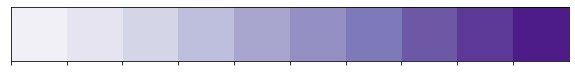

In [12]:
sns.palplot(sns.color_palette("Purples", 10)) 

In [13]:
new_purples=sns.color_palette("Purples", 10)[0:7]

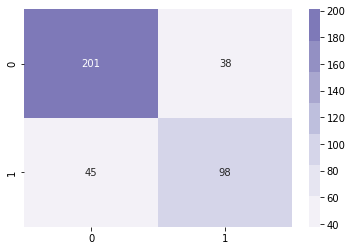

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
con=confusion_matrix(Y_test,Y_pred_RF)
sn.heatmap(con,annot=True,cmap=new_purples,fmt='g')

In [15]:
import sklearn.metrics as metrics

In [16]:
# Random Forest outcome
# y_pred为预测概率，需要转换成类别，一般>0.5为1
Y_pred_RF=np.where(Y_pred_RF>0.5,1,0)
print('Accuracy score为 %2.3f'%metrics.accuracy_score(Y_test,Y_pred_RF))
#准确率、召回率和F1score
print(metrics.recall_score(Y_test,Y_pred_RF),metrics.precision_score(Y_test,Y_pred_RF),metrics.f1_score(Y_test,Y_pred_RF))

Accuracy score为 0.783
0.6853146853146853 0.7205882352941176 0.7025089605734767


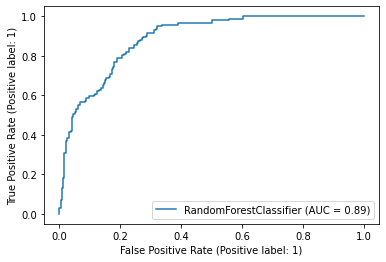

In [17]:
## ROC curve--RF
from sklearn.metrics import RocCurveDisplay
RF_disp = RocCurveDisplay.from_estimator(RFclassifier, X_test, Y_test)
plt.show()

In [20]:
test['Y_pred_RF'] = Y_pred_RF


,score,Subjectivity,Polarity,length,ABS,Days.of.comments,usefulness,Y_pred_RF
0,3,0.496759,0.160185,90,0,17,0,0
1,3,0.343750,0.081250,93,0,17,0,0
2,2,0.472917,-0.160417,72,1,17,0,1
3,3,0.675000,0.325000,61,0,19,0,0
4,4,0.382792,0.044870,92,1,20,1,0


In [22]:
test.to_excel("RF_Pred.xlsx")